In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: P

In [4]:
!pip install pandas 

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 10.3MB 3.6MB/s eta 0:00:01   40% |█████████████                   | 4.1MB 12.7MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas as pd

In [6]:
x_data = np.linspace(0.0,10.0,1000000)

In [7]:
noise = np.random.randn(len(x_data))

In [8]:
x_data 

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [9]:
noise 

array([ 0.42636169, -0.4946311 ,  0.07981917, ..., -0.75834567,
        1.27866045, -0.2026612 ])

Y = mx t b

b =5 

In [10]:
y_true = (0.5 * x_data) + 5 + noise

In [11]:
y_true

array([ 5.42636169,  4.5053739 ,  5.07982917, ...,  9.24164433,
       11.27865545,  9.7973388 ])

In [12]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,5.426362
1,0.00001,4.505374
2,0.00002,5.079829
3,0.00003,4.141485
4,0.00004,4.470727


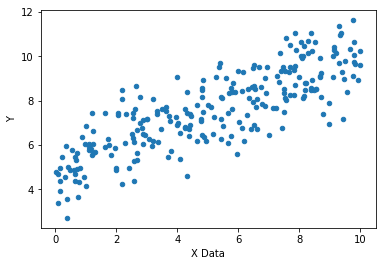

In [14]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [15]:
batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [16]:
xph = tf.placeholder(tf.float32,[batch_size])

In [17]:
yph = tf.placeholder(tf.float32,[batch_size])

In [19]:
# model 
y_model = m*xph + b

# loss function is here 
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)  
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [29]:
model_m

0.5500346

In [30]:
model_b

5.021373

In [31]:
y_hat = x_data*model_m + model_b

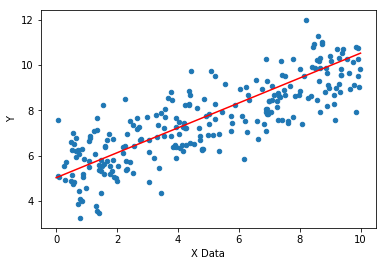

In [32]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')